# Waveform Generation for Linear Frequency Modulation

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, waveforms

In [31]:
fStart = 5 #frequency in Hz
fStop = 8005 #freqency in Hz
minsampTime=1/(fStop-fStart)
sweepTime=8 #time in seconds
minNumPnts=sweepTime/minsampTime
useNumPnts=minNumPnts*4 #Nyquist rate
print('The number of points to use is ~', useNumPnts/1000000, 'million points.')

The number of points to use is ~ 0.256 million points.


In [40]:
scanTime = sweepTime*1.0#make this a float to retain precision (seconds)
samplePeriod = 0.025 #value in ms
sampleSpacing = samplePeriod/1000 #convert to seconds

fStart *=1.0 #make sure it is a float
sweepRate = np.abs((fStart-fStop)/scanTime)
#Keep in mind the correct length relative to total TOF scan time and actual sweep time
#e.g. 60 us at 133333 give 8 seconds but sweep time is 7.998 or 133300
numPoints = int(scanTime/sampleSpacing)#80#9600000#of points across your experiment
stepTime = scanTime/numPoints
print("Step Period (s): ", stepTime)
print("Sweep Rate (Hz/s)", sweepRate)
print("Num Points: %d"%numPoints)
t = np.linspace(0, scanTime, numPoints)
pulseSeq = chirp(t, f0=fStart, f1=fStop, t1 = scanTime, method = 'linear')

Step Period (s):  2.5e-05
Sweep Rate (Hz/s) 1000.0
Num Points: 320000


In [41]:
print(len(pulseSeq)/1000000, 'million points')

0.32 million points


In [42]:
#State that your output sequence will have when gate is open. 
hiState = 1

In [43]:
posIndex = np.where(pulseSeq>0)[0]#account to make things into a square wave
negIndex = np.where(pulseSeq<0)[0]
pulseSeq[posIndex]=hiState 
pulseSeq[negIndex]=0

In [44]:
plt.rcParams['figure.figsize'] = [16,5]

Text(0.5, 0, 'Sequence Point')

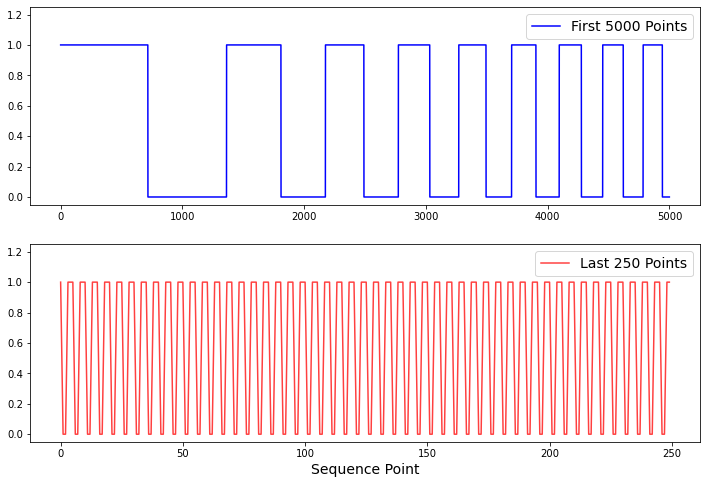

In [46]:
fig, axList = plt.subplots(nrows = 2, figsize = (12,8))
firstInd = 5000
axList[0].plot(pulseSeq[0:firstInd], 'b-', label = 'First %d Points'%firstInd)
axList[0].set_ylim(-0.05, 1.25)
axList[0].legend(fontsize = 14)

lastInd = 250
axList[1].plot(pulseSeq[-lastInd:], 'r-', alpha = 0.75, label = 'Last %d Points'%lastInd)
axList[1].set_ylim(-0.05, 1.25)
axList[1].legend(fontsize = 14)
axList[1].set_xlabel("Sequence Point", fontsize = 14)

## Save Sequence to File
* Be mindful of the number of points you are saving...

In [10]:
freqRange = int((fStop-fStart)/1000)#note rounding by int
fileName = "LFM_%ds_%dkHz.csv"%(sweepTime,freqRange)
print(fileName)
# np.savetxt(fileName, pulseSeq, delimiter = ',', fmt = '%d')

LFM_8s_8kHz.csv
